# Mean Shift 
- KDE(Kernel Density Estimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
- KDE(Kernel Density Estimation) : kernel 함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 방식
- 별도의 군집화 개수를 지정하지 않음
- 분포도에 기반하여 자동으로 군집화 개수가 정해짐
- 특정 데이터가 반경 내의 데이터 분포 확률 밀도가 가장 높은곳으로 이동 —> 주변 데이터들과의 거리값을 Kernel 함수 값으로 입력 —> 반환값을 현재 위치에서 업데이트 하면서 이동

# Sklearn MeanShift
- 사이킷런은 Mean Shift 군집화를 위해 MeanShift 클래스를 제공
- bandwidth : MeanShift 클래스의 가장 중요한 초기화 파라미터. 밀도 중심으로 이동할 때 사용되는 커널 함수의 bandwidth. 이를 어떻게 설정하느냐에 따라 군집화 성능이 달라짐
- 최적의 bandwidth 계산을 위해 sklearn은 estimate_bandwidth() 함수를 제공
- Data mining보다는 영상(특히 object tracking쪽에 많이 사용)

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.6, random_state = 0)

# MeanShift를 이용하여 군집화 수행
meanshift = MeanShift(bandwidth = 0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


- 커널함수의 bandwidth크기를 1로 증가 후 군집화 재수행

In [4]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)

- 최적의 bandwidth 값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행

In [5]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile = 0.25)
print('bandwidth 값 : ', round(bandwidth, 3))

bandwidth 값 :  1.323


In [11]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift= MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


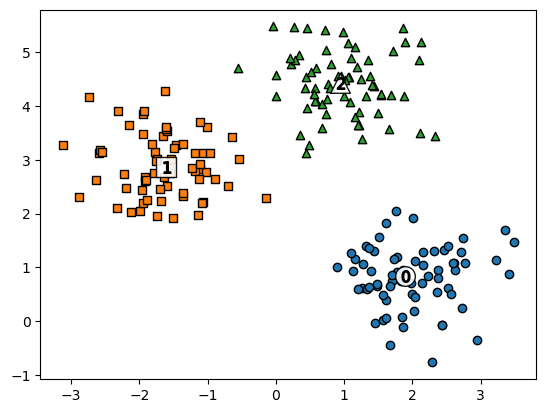

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x = label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',
                edgecolor = 'k', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k',
                edgecolor = 'k', marker = '$%d$' % label)

In [16]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       2                  67
1       0                  67
2       1                  66
Name: meanshift_label, dtype: int64
